In [1]:
%matplotlib inline


Group analysis of resting-state fMRI with ICA: CanICA
=====================================================

An example applying CanICA to resting-state data. This example applies it
to 30 subjects of the ADHD200 datasets. Then it plots a map with all the
components together and an axial cut for each of the components separately.

CanICA is an ICA method for group-level analysis of fMRI data. Compared
to other strategies, it brings a well-controlled group model, as well as a
thresholding algorithm controlling for specificity and sensitivity with
an explicit model of the signal. The reference papers are:

    * G. Varoquaux et al. "A group model for stable multi-subject ICA on
      fMRI datasets", NeuroImage Vol 51 (2010), p. 288-299

    * G. Varoquaux et al. "ICA-based sparse features recovery from fMRI
      datasets", IEEE ISBI 2010, p. 1177

Pre-prints for both papers are available on hal
(http://hal.archives-ouvertes.fr)

<div class="alert alert-info"><h4>Note</h4><p>The use of the attribute `components_img_` from decomposition
    estimators is implemented from version 0.4.1.
    For older versions, unmask the deprecated attribute `components_`
    to get the components image using attribute `masker_` embedded in
    estimator.
    See the `section Inverse transform: unmasking data <unmasking_step>`.</p></div>



First we load the ADHD200 data
-------------------------------



In [1]:
from nilearn import datasets

adhd_dataset = datasets.fetch_adhd(n_subjects=3)
func_filenames = adhd_dataset.func  # list of 4D nifti files for each subject

# print basic information on the dataset
print('First functional nifti image (4D) is at: %s' %
      func_filenames[0])  # 4D data

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


First functional nifti image (4D) is at: /home/ienu/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


/home/ienu/Documents/nilearn-deep/nilearn/datasets/func.py:502: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [2]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
data=canica.prepare_data(func_filenames)

[MultiNiftiMasker.fit] Loading data from [/home/ienu/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz, /home/ienu/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz, /home/ienu/nilearn_data/adhd/da
[MultiNiftiMasker.fit] Computing mask


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s finished


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/ienu/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/ienu/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/ienu/nilearn_data/adhd/data/0010128/0010128_rest_tshift_RPI_voreg_mni.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.

Here we apply CanICA on the data
---------------------------------



In [11]:
print(data.shape)
import numpy as np
np.save('/home/share/TmpData/Qinglin/HCP_Group/MOTOR_30.npy', data)


(60, 63043)


In [9]:
b=np.load('test.npy')
print(b.shape)

(60, 63043)


In [8]:

print(data.shape)
canica._raw_fit(data)
# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [/home/uga_qinglin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz, /home/uga_qinglin/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz, /home/uga_qinglin
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
(200, 64992)
[Memory]0.1s, 0.0min    : Loading randomized_svd from nilearn_cache/joblib/sklearn/utils/extmath/randomized_svd/018a0be6657ab2722726e4968a6938fa
______________________________________randomized_svd cache loaded - 0.0s, 0.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[Memory]0.4s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/c2898e71f10d6a7dfb608011a477c359
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]0.5s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/51f9ba24ca41dcef04c389576f89fc4c
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]0.7s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/d1747de7922a913316fd4af730587270
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]0.8s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/1b16e4c9db1a2821535c9b844e7b040d


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]0.9s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/cf61f2ba17151409d68874d07758e17c
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]1.0s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/ae906ddc8e560cc4b85548645f79b995


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]1.1s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/3db0f92c585c2504b925342cecd67668
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]1.2s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/f64b26c32ef2db01be1a626870620fc7


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]1.4s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/4ff91967ae387ba37bbfcdac7be06ec5
_____________________________________________fastica cache loaded - 0.1s, 0.0min
[Memory]1.5s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/d37f4a33c7ce9efbaaf765fdefc7c755


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.1s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


To visualize we plot the outline of all components on one figure
-----------------------------------------------------------------



/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


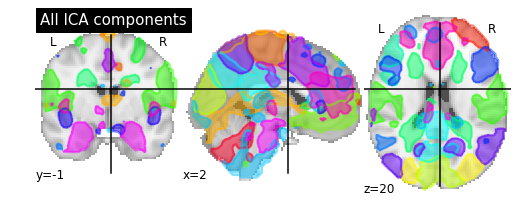

In [4]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(components_img, title='All ICA components')

Finally, we plot the map for each ICA component separately
-----------------------------------------------------------



/home/uga_qinglin/Documents/nilearn-deep/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


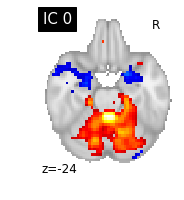

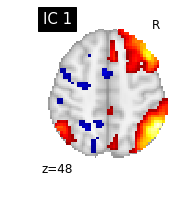

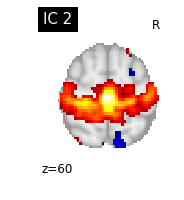

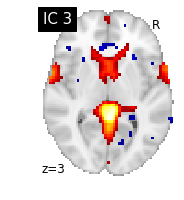

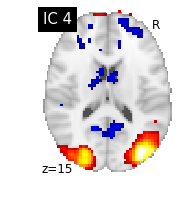

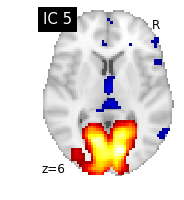

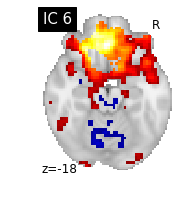

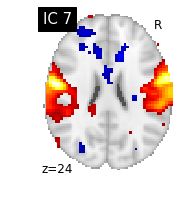

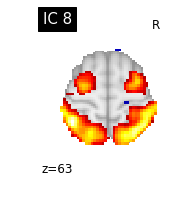

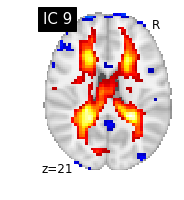

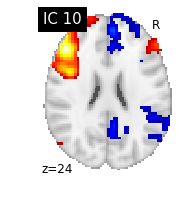

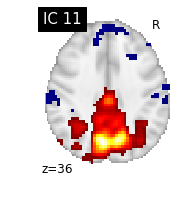

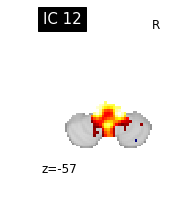

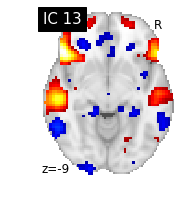

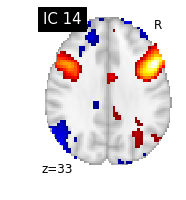

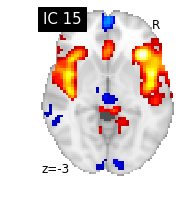

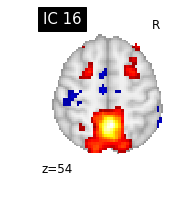

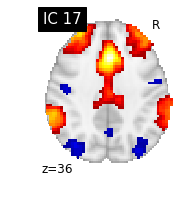

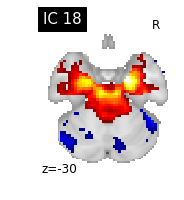

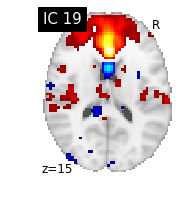

In [5]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [24]:
from nilearn.image import load_img
from nilearn.datasets import load_mni152_template
template = load_mni152_template()
template_img = load_img(template)

raw=load_img(func_filenames[0])
from nilearn.image import resample_to_img
resampled_stat_img = resample_to_img(raw, template)

original_shape = components_img.shape
original_affine = components_img.affine
resampled_shape = resampled_stat_img.shape
resampled_affine = resampled_stat_img.affine
template_shape = template_img.shape
template_affine = template_img.affine
print("""Shape comparison:
- Original t-map image shape : {0}
- Resampled t-map image shape: {1}
- Template image shape       : {2}
""".format(original_shape, resampled_shape, template_shape))

print("""Affine comparison:
- Original t-map image affine :\n {0}
- Resampled t-map image affine:\n {1}
- Template image affine       :\n {2}
""".format(original_affine, resampled_affine, template_affine))

Shape comparison:
- Original t-map image shape : (61, 73, 61, 20)
- Resampled t-map image shape: (91, 109, 91, 176)
- Template image shape       : (91, 109, 91)

Affine comparison:
- Original t-map image affine :
 [[  -3.   -0.   -0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
- Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]



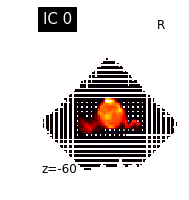

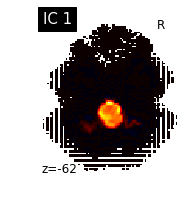

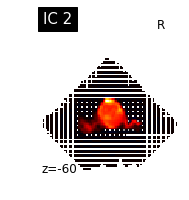

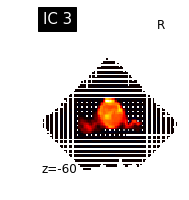

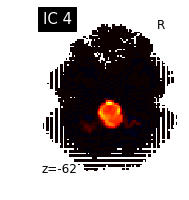

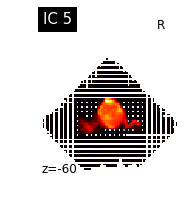

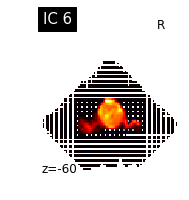

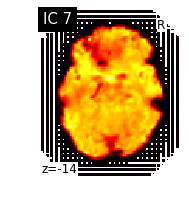

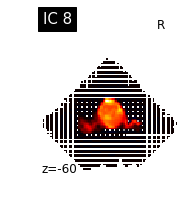

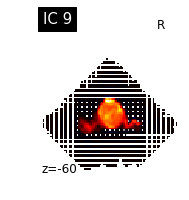

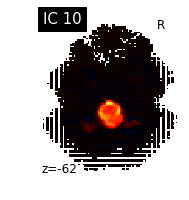

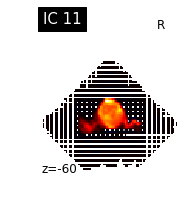

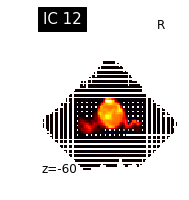

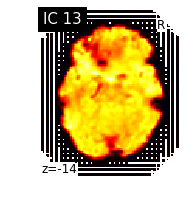

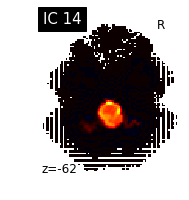

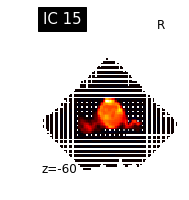

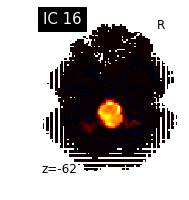

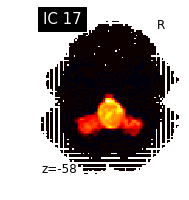

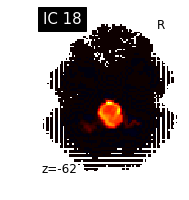

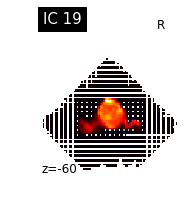

KeyboardInterrupt: 

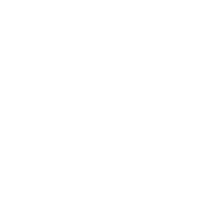

In [25]:

from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

#raw=load_img(func_filenames)

for i, cur_img in enumerate(iter_img(resampled_stat_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
    show()


In [ ]:
from nilearn import datasets
from nilearn.image import load_img
adhd_dataset = datasets.fetch_adhd(n_subjects=1)
func_filenames = adhd_dataset.func  # list of 4D nifti files for each subject
raw=load_img(func_filenames)

from nilearn.datasets import load_mni152_template
template = load_mni152_template()
template_img = load_img(template)

from nilearn.image import resample_to_img
resampled_stat_img = resample_to_img(raw, template)

from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
for i, cur_img in enumerate(iter_img(resampled_stat_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
    show()
